In [1]:
!pip install yfinance python-dotenv


[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from scipy import stats
from datetime import datetime, timedelta
import yfinance as yf
import os
from dotenv import load_dotenv

warnings.filterwarnings('ignore')
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

np.random.seed(42)
load_dotenv()

True

In [3]:
warnings.filterwarnings('ignore')
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

print("📊 Financial Market Volatility & Correlation Study")

📊 Financial Market Volatility & Correlation Study


In [4]:
print("\n1️⃣ Setting up data sources...")

ASSETS = {
    'stocks': {
        'AAPL': 'Apple Inc.',
        'GOOGL': 'Google',
        'TSLA': 'Tesla',
        'SPY': 'S&P 500 ETF',
        'QQQ': 'NASDAQ ETF'
    },
    'commodities': {
        'GLD': 'Gold ETF',
        'SLV': 'Silver ETF',
        'USO': 'Oil ETF',
        'DBA': 'Agriculture ETF'
    }
}

print(f"Assets to analyze: {sum(len(v) for v in ASSETS.values())} total")
print("Categories:", list(ASSETS.keys()))


1️⃣ Setting up data sources...
Assets to analyze: 9 total
Categories: ['stocks', 'commodities']


In [5]:
print("\n2️⃣ Collecting market data...")

def get_stock_data_yfinance(symbol, period='2y'):
    try:
        ticker = yf.Ticker(symbol)
        data = ticker.history(period=period)

        if data.empty:
            print(f"⚠️  No data found for {symbol}")
            return None

        data.columns = [col.lower() for col in data.columns]
        return data
    except Exception as e:
        print(f"⚠️  Error fetching {symbol}: {e}")
        return None


2️⃣ Collecting market data...


In [6]:
print("\n📥 Downloading data for all assets...")

all_data = {}
all_prices = pd.DataFrame()

print("\n📈 Fetching stock market data...")
for symbol, name in ASSETS['stocks'].items():
    print(f"  Downloading {name} ({symbol})...")
    data = get_stock_data_yfinance(symbol)
    if data is not None:
        all_data[f"{symbol}_STOCK"] = data
        all_prices[f"{symbol}_STOCK"] = data['close']

# Get commodity data
print("\n🥇 Fetching commodity data...")
for symbol, name in ASSETS['commodities'].items():
    print(f"  Downloading {name} ({symbol})...")
    data = get_stock_data_yfinance(symbol)
    if data is not None:
        all_data[f"{symbol}_COMMODITY"] = data
        all_prices[f"{symbol}_COMMODITY"] = data['close']

# Align all price data to common dates
all_prices = all_prices.sort_index()
print(f"\n✅ Data collection complete!")
print(f"   Total assets collected: {len(all_prices.columns)}")
print(f"   Date range: {all_prices.index.min().date()} to {all_prices.index.max().date()}")
print(f"   Total trading days: {len(all_prices)}")


📥 Downloading data for all assets...

📈 Fetching stock market data...

🥇 Fetching commodity data...

✅ Data collection complete!
   Total assets collected: 9
   Date range: 2023-08-23 to 2025-08-22
   Total trading days: 502


In [7]:
print(all_prices)

                           AAPL_STOCK  GOOGL_STOCK  TSLA_STOCK   SPY_STOCK  \
Date                                                                         
2023-08-23 00:00:00-04:00  179.363129   131.580856  236.860001  431.543701   
2023-08-24 00:00:00-04:00  174.669159   129.006302  230.039993  425.562927   
2023-08-25 00:00:00-04:00  176.877502   129.105713  238.589996  428.563049   
2023-08-28 00:00:00-04:00  178.442169   130.228958  238.820007  431.280762   
2023-08-29 00:00:00-04:00  182.334030   133.767761  257.179993  437.514740   
...                               ...          ...         ...         ...   
2025-08-18 00:00:00-04:00  230.889999   203.500000  335.160004  643.299988   
2025-08-19 00:00:00-04:00  230.559998   201.570007  329.309998  639.809998   
2025-08-20 00:00:00-04:00  226.009995   199.320007  323.899994  638.109985   
2025-08-21 00:00:00-04:00  224.899994   199.750000  320.109985  635.549988   
2025-08-22 00:00:00-04:00  227.759995   206.089996  340.010010  

In [8]:
print("\n4️⃣ Computing returns and basic statistics...")

returns = all_prices.pct_change().dropna()

# Return metrics
return_stats = pd.DataFrame({
    'Mean_Daily_Return': returns.mean(),
    'Std_Daily_Return': returns.std(),
    'Annualized_Return': returns.mean() * 252,
    'Annualized_Volatility': returns.std() * np.sqrt(252),
    'Sharpe_Ratio': (returns.mean() * 252) / (returns.std() * np.sqrt(252)),
    'Skewness': returns.skew(),
    'Kurtosis': returns.kurtosis(),
    'Min_Daily_Return': returns.min(),
    'Max_Daily_Return': returns.max()
})

return_stats = return_stats.round(4)

print("📊 Return Statistics Summary:")
print(return_stats.head(10))


4️⃣ Computing returns and basic statistics...
📊 Return Statistics Summary:
               Mean_Daily_Return  Std_Daily_Return  Annualized_Return  \
AAPL_STOCK                0.0006            0.0175             0.1584   
GOOGL_STOCK               0.0011            0.0186             0.2693   
TSLA_STOCK                0.0015            0.0401             0.3810   
SPY_STOCK                 0.0009            0.0104             0.2160   
QQQ_STOCK                 0.0010            0.0132             0.2485   
GLD_COMMODITY             0.0012            0.0100             0.2931   
SLV_COMMODITY             0.0011            0.0176             0.2707   
USO_COMMODITY             0.0003            0.0187             0.0668   
DBA_COMMODITY             0.0007            0.0096             0.1826   

               Annualized_Volatility  Sharpe_Ratio  Skewness  Kurtosis  \
AAPL_STOCK                    0.2780        0.5697    0.9491   14.0461   
GOOGL_STOCK                   0.2950        0

In [9]:
print("\n5️⃣ Analyzing volatility patterns...")

rolling_windows = [7, 30, 90]
volatility_data = {}

for window in rolling_windows:
    vol_name = f'volatility_{window}d'
    rolling_vol = returns.rolling(window=window).std() * np.sqrt(252)
    volatility_data[vol_name] = rolling_vol

asset_classes = ['STOCK', 'COMMODITY']
volatility_comparison = {}

for asset_class in asset_classes:
    class_columns = [col for col in returns.columns if asset_class in col]
    if class_columns:
        class_volatility = returns[class_columns].std() * np.sqrt(252)
        volatility_comparison[asset_class] = {
            'average_volatility': class_volatility.mean(),
            'min_volatility': class_volatility.min(),
            'max_volatility': class_volatility.max(),
            'assets': class_volatility.to_dict()
        }

print("📈 Average Annualized Volatility by Asset Class:")
for asset_class, vol_data in volatility_comparison.items():
    print(f"   {asset_class}: {vol_data['average_volatility']:.2%}")
    print(f"     Range: {vol_data['min_volatility']:.2%} - {vol_data['max_volatility']:.2%}")


5️⃣ Analyzing volatility patterns...
📈 Average Annualized Volatility by Asset Class:
   STOCK: 31.68%
     Range: 16.50% - 63.63%
   COMMODITY: 22.20%
     Range: 15.29% - 29.73%


In [10]:
print("\n6️⃣ Computing correlation matrices...")

correlation_matrix = returns.corr()

rolling_correlation_periods = [30, 90, 180]
rolling_correlations = {}

major_assets = ['SPY_STOCK', 'GLD_COMMODITY']
major_assets = [asset for asset in major_assets if asset in returns.columns]

if len(major_assets) >= 2:
    for period in rolling_correlation_periods:
        corr_name = f'rolling_corr_{period}d'
        rolling_correlations[corr_name] = {}

        for i, asset1 in enumerate(major_assets):
            for j, asset2 in enumerate(major_assets):
                if i < j:  # Avoid duplicate pairs
                    pair_name = f"{asset1}_vs_{asset2}"
                    rolling_corr = returns[asset1].rolling(window=period).corr(returns[asset2])
                    rolling_correlations[corr_name][pair_name] = rolling_corr

print("🔗 Correlation analysis complete")


6️⃣ Computing correlation matrices...
🔗 Correlation analysis complete


In [11]:
print("\n7️⃣ Running statistical tests...")

gold_returns = returns['GLD_COMMODITY'] if 'GLD_COMMODITY' in returns.columns else None

statistical_tests = {}


# Compare stock market correlations
stock_columns = [col for col in returns.columns if 'STOCK' in col]

if len(stock_columns) > 1:
    stock_corr_matrix = returns[stock_columns].corr()
    avg_stock_correlation = stock_corr_matrix.values[np.triu_indices_from(stock_corr_matrix.values, k=1)].mean()
    statistical_tests['Average_Stock_Correlation'] = avg_stock_correlation

# Normality tests for major assets
normality_tests = {}
for asset in major_assets:
    if asset in returns.columns:
        asset_returns = returns[asset].dropna()
        shapiro_stat, shapiro_p = stats.shapiro(asset_returns.sample(min(5000, len(asset_returns))))
        jarque_bera_stat, jarque_bera_p = stats.jarque_bera(asset_returns)

        normality_tests[asset] = {
            'Shapiro_Wilk_Stat': shapiro_stat,
            'Shapiro_Wilk_P_Value': shapiro_p,
            'Jarque_Bera_Stat': jarque_bera_stat,
            'Jarque_Bera_P_Value': jarque_bera_p,
            'Normal_Distribution': shapiro_p > 0.05 and jarque_bera_p > 0.05
        }

print("📊 Statistical tests completed")



7️⃣ Running statistical tests...
📊 Statistical tests completed


In [12]:
print("\n8️⃣ Computing beta coefficients...")

# Use SPY as market benchmark
market_benchmark = 'SPY_STOCK'
beta_coefficients = {}

if market_benchmark in returns.columns:
    market_returns = returns[market_benchmark].dropna()

    # Calculate metrics for the market benchmark itself
    if len(market_returns) > 50:
        beta_coefficients[market_benchmark] = {
            'Beta': 1.0,
            'Correlation_with_Market': 1.0,
            'R_Squared': 1.0,
            'Data_Points': len(market_returns)
        }

    for asset in returns.columns:
        if asset != market_benchmark and not returns[asset].isna().all():
            asset_returns = returns[asset]

            # Remove NaN values for both series
            combined_data = pd.DataFrame({'asset': asset_returns, 'market': market_returns}).dropna()

            if len(combined_data) > 50:  # Ensure sufficient data points
                covariance = combined_data['asset'].cov(combined_data['market'])
                market_variance = combined_data['market'].var()

                beta = covariance / market_variance if market_variance > 0 else np.nan

                correlation = combined_data['asset'].corr(combined_data['market'])
                r_squared = correlation ** 2

                beta_coefficients[asset] = {
                    'Beta': beta,
                    'Correlation_with_Market': correlation,
                    'R_Squared': r_squared,
                    'Data_Points': len(combined_data)
                }

print(f"📈 Beta coefficients calculated for {len(beta_coefficients)} assets")


8️⃣ Computing beta coefficients...
📈 Beta coefficients calculated for 9 assets


In [13]:
print("\n9️⃣ Creating visualizations...")

# Set up the plotting style (do this once)
plt.rcParams['figure.figsize'] = (15, 10)
plt.rcParams['axes.grid'] = True
plt.rcParams['grid.alpha'] = 0.3


9️⃣ Creating visualizations...


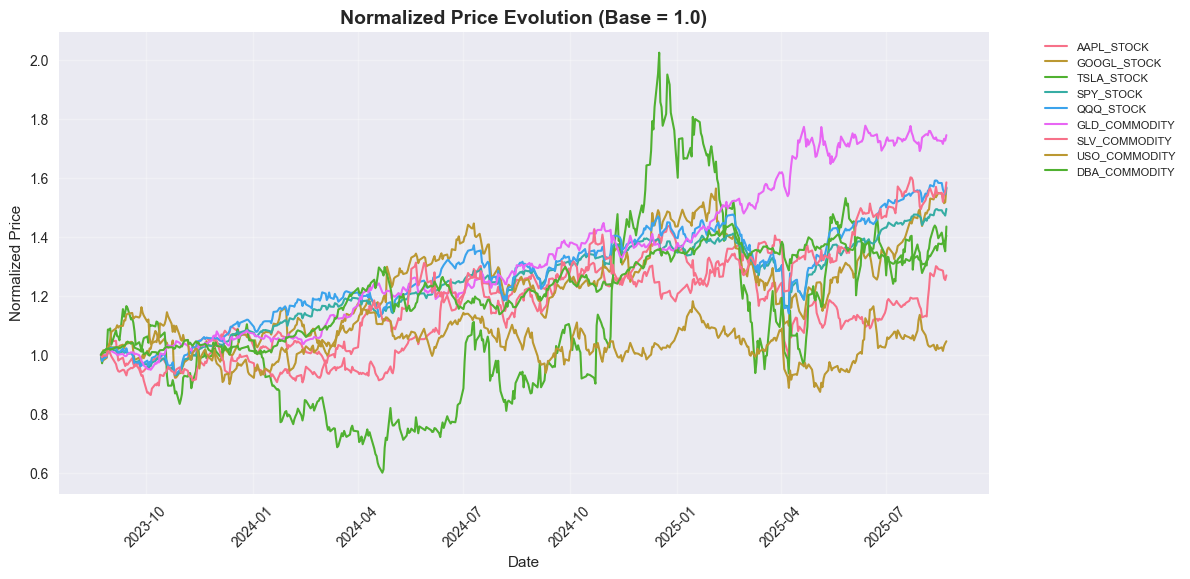

In [14]:
# Price Evolution
plt.figure(figsize=(12, 6))
for col in all_prices.columns[:]:
    normalized_prices = all_prices[col] / all_prices[col].iloc[0]
    plt.plot(all_prices.index, normalized_prices, label=col, linewidth=1.5)

plt.title('Normalized Price Evolution (Base = 1.0)', fontsize=14, fontweight='bold')
plt.xlabel('Date')
plt.ylabel('Normalized Price')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=8)
plt.xticks(rotation=45)
plt.show()

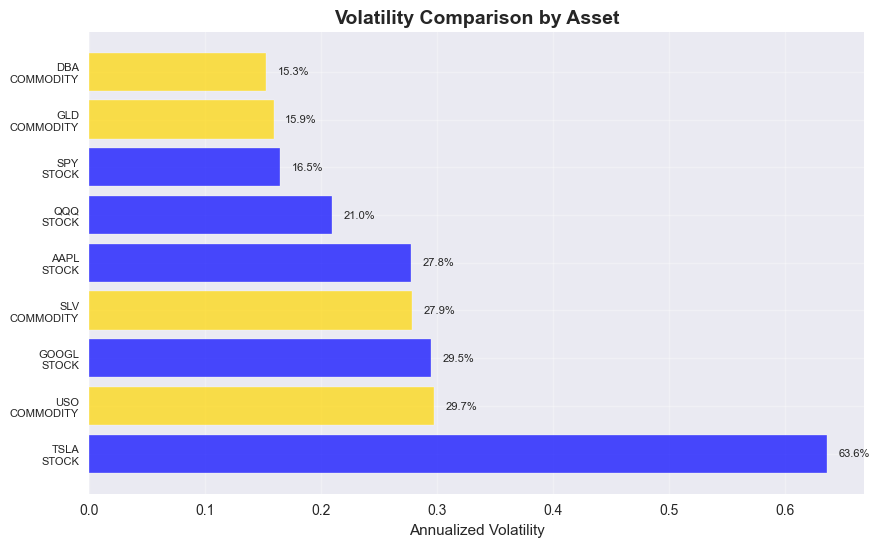

In [15]:
# Volatility Comparison
plt.figure(figsize=(10, 6))
vol_data = return_stats['Annualized_Volatility'].sort_values(ascending=True)
colors = ['blue' if 'STOCK' in x else 'gold' for x in vol_data.index]
bars = plt.barh(range(len(vol_data)), vol_data.values, color=colors, alpha=0.7)

plt.yticks(range(len(vol_data)), [x.replace('_', '\n') for x in vol_data.index], fontsize=8)
plt.xlabel('Annualized Volatility')
plt.title('Volatility Comparison by Asset', fontsize=14, fontweight='bold')
plt.gca().invert_yaxis()

for i, bar in enumerate(bars):
    width = bar.get_width()
    plt.text(width + 0.01, bar.get_y() + bar.get_height()/2,
             f'{width:.1%}', ha='left', va='center', fontsize=8)
plt.show()

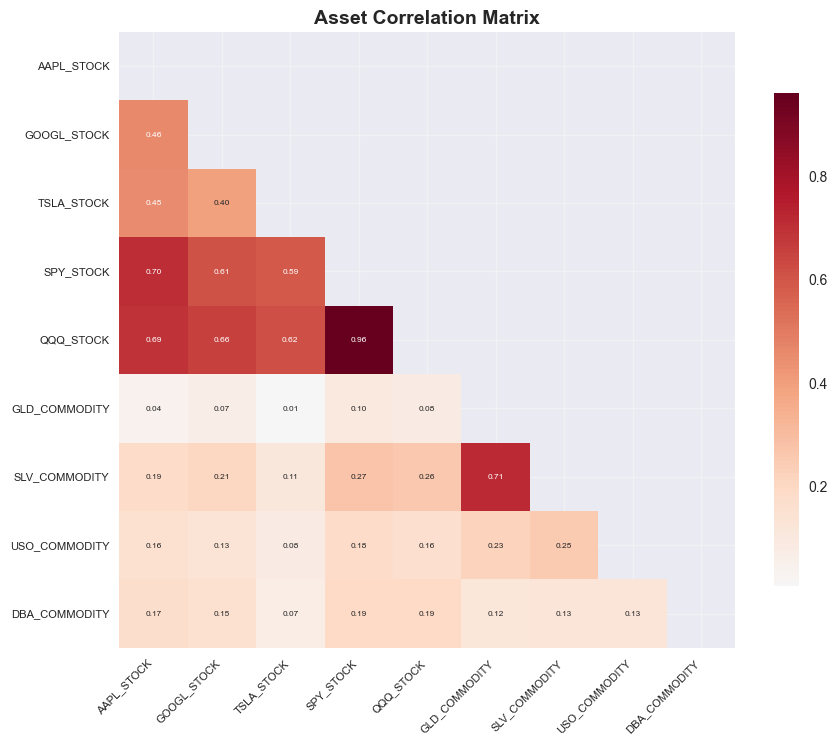

In [16]:
#Correlation Heatmap
plt.figure(figsize=(10, 8))
mask = np.triu(np.ones_like(correlation_matrix.values, dtype=bool))
sns.heatmap(correlation_matrix, mask=mask, annot=True, cmap='RdBu_r', center=0,
            square=True, fmt='.2f', cbar_kws={"shrink": .8}, annot_kws={'size': 6})
plt.title('Asset Correlation Matrix', fontsize=14, fontweight='bold')
plt.xticks(rotation=45, ha='right', fontsize=8)
plt.yticks(rotation=0, fontsize=8)
plt.show()

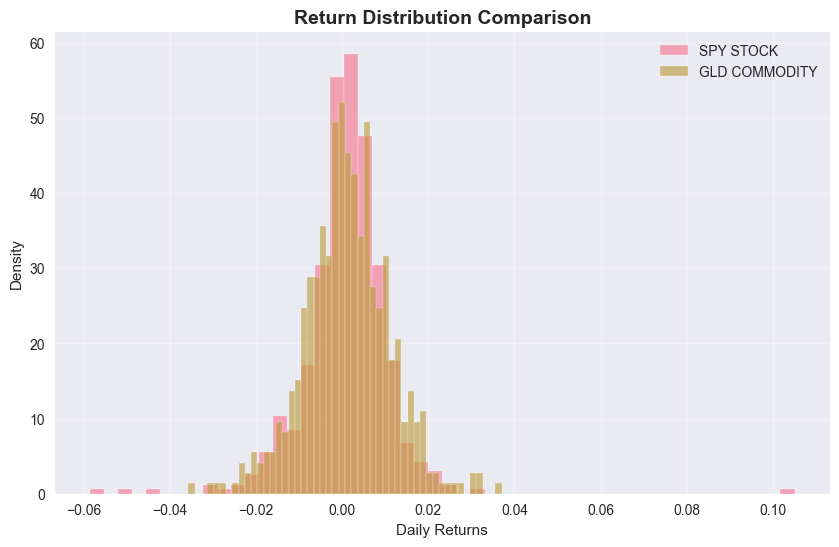

In [17]:
# Return Distribution Comparison
plt.figure(figsize=(10, 6))
for asset in major_assets[:]:
    if asset in returns.columns:
        asset_returns = returns[asset].dropna()
        plt.hist(asset_returns, bins=50, alpha=0.6, label=asset.replace('_', ' '), density=True)

plt.xlabel('Daily Returns')
plt.ylabel('Density')
plt.title('Return Distribution Comparison', fontsize=14, fontweight='bold')
plt.legend()
plt.show()

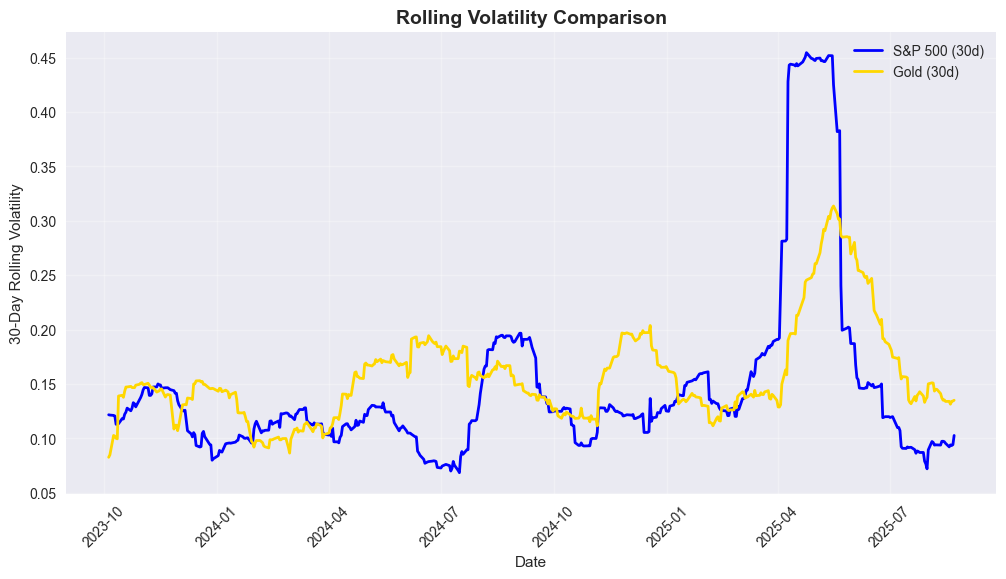

In [18]:
# Rolling Volatility
plt.figure(figsize=(12, 6))
if 'SPY_STOCK' in returns.columns:
    spy_vol = returns['SPY_STOCK'].rolling(30).std() * np.sqrt(252)
    plt.plot(spy_vol.index, spy_vol, label='S&P 500 (30d)', color='blue', linewidth=2)

if 'GLD_COMMODITY' in returns.columns:
    gold_vol = returns['GLD_COMMODITY'].rolling(30).std() * np.sqrt(252)
    plt.plot(gold_vol.index, gold_vol, label='Gold (30d)', color='gold', linewidth=2)

plt.xlabel('Date')
plt.ylabel('30-Day Rolling Volatility')
plt.title('Rolling Volatility Comparison', fontsize=14, fontweight='bold')
plt.legend()
plt.xticks(rotation=45)
plt.show()

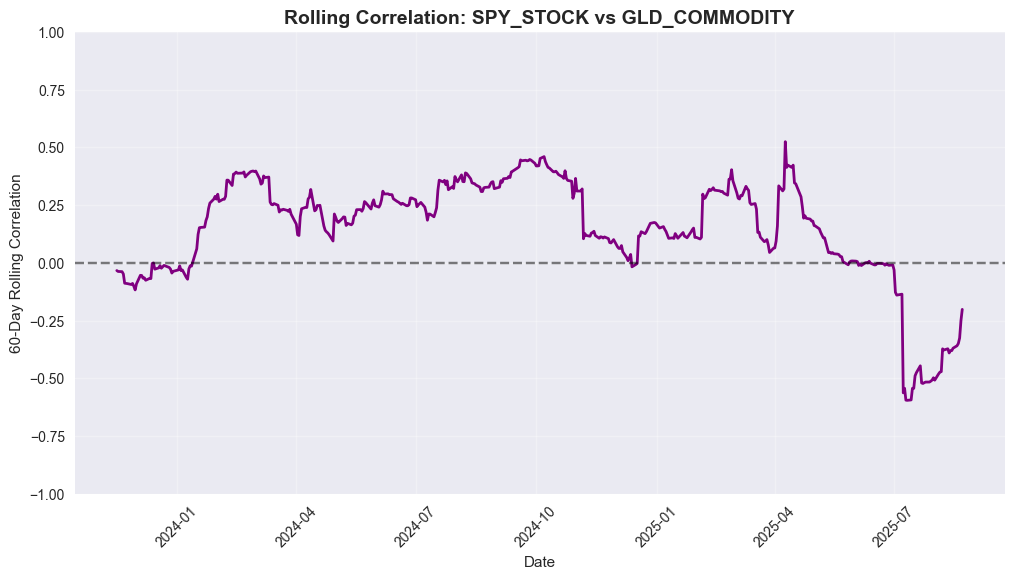

In [19]:
# Rolling Correlation
plt.figure(figsize=(12, 6))
if len(major_assets) >= 2 and all(asset in returns.columns for asset in major_assets[:2]):
    rolling_corr = returns[major_assets[0]].rolling(60).corr(returns[major_assets[1]])
    plt.plot(rolling_corr.index, rolling_corr, linewidth=2, color='purple')
    plt.axhline(y=0, color='black', linestyle='--', alpha=0.5)

    plt.xlabel('Date')
    plt.ylabel('60-Day Rolling Correlation')
    plt.title(f'Rolling Correlation: {major_assets[0]} vs {major_assets[1]}', fontsize=14, fontweight='bold')
    plt.xticks(rotation=45)
    plt.ylim(-1, 1)
plt.show()

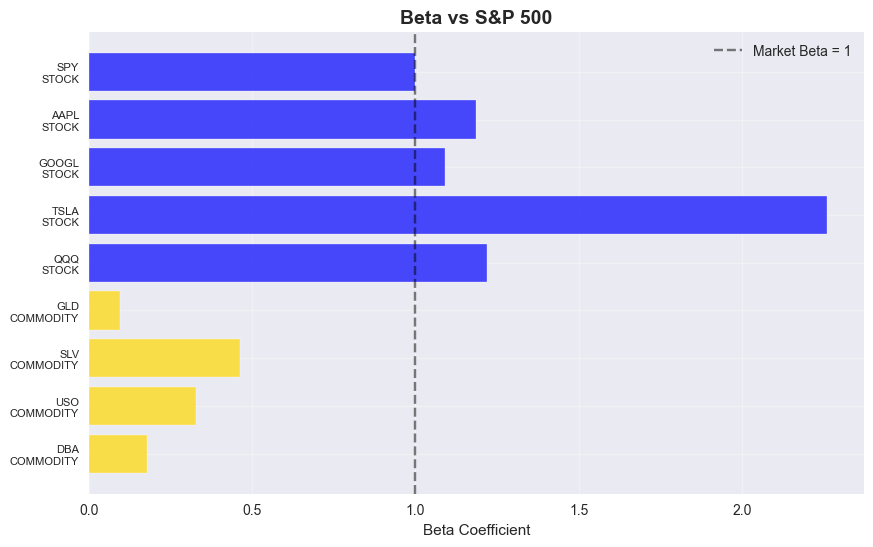

In [20]:
# Beta Coefficients
plt.figure(figsize=(10, 6))
if beta_coefficients:
    beta_values = {k: v['Beta'] for k, v in beta_coefficients.items() if not np.isnan(v['Beta'])}
    if beta_values:
        assets = list(beta_values.keys())
        betas = list(beta_values.values())
        colors = ['blue' if 'STOCK' in x else 'gold' for x in assets]

        bars = plt.barh(range(len(assets)), betas, color=colors, alpha=0.7)
        plt.yticks(range(len(assets)), [x.replace('_', '\n') for x in assets], fontsize=8)
        plt.xlabel('Beta Coefficient')
        plt.title('Beta vs S&P 500', fontsize=14, fontweight='bold')
        plt.axvline(x=1, color='black', linestyle='--', alpha=0.5, label='Market Beta = 1')
        plt.legend()
        plt.gca().invert_yaxis()
plt.show()

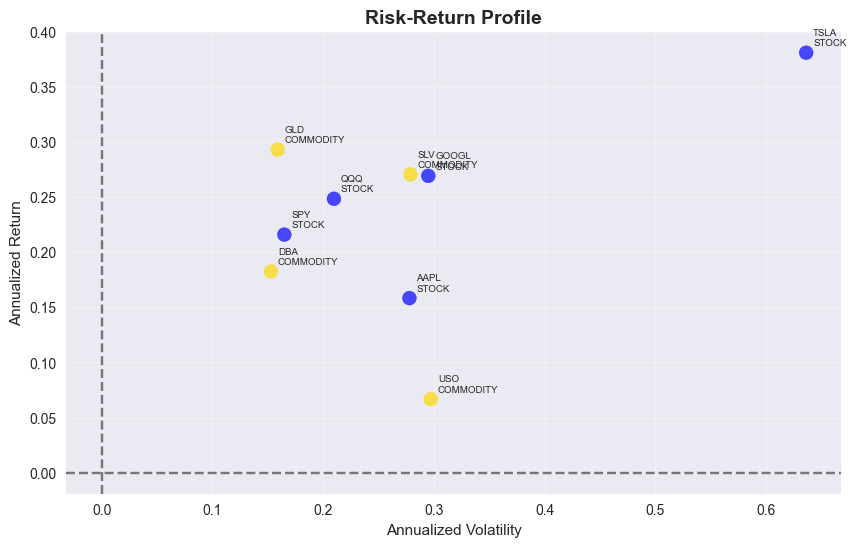

In [21]:
# Risk-Return Scatter
plt.figure(figsize=(10, 6))
risk = return_stats['Annualized_Volatility']
returns_annual = return_stats['Annualized_Return']

colors = ['blue' if 'STOCK' in x else 'gold' for x in risk.index]
plt.scatter(risk, returns_annual, c=colors, alpha=0.7, s=100)

for i, asset in enumerate(risk.index):
    plt.annotate(asset.replace('_', '\n'), (risk[asset], returns_annual[asset]),
                xytext=(5, 5), textcoords='offset points', fontsize=7)

plt.xlabel('Annualized Volatility')
plt.ylabel('Annualized Return')
plt.title('Risk-Return Profile', fontsize=14, fontweight='bold')
plt.axhline(y=0, color='black', linestyle='--', alpha=0.5)
plt.axvline(x=0, color='black', linestyle='--', alpha=0.5)
plt.show()

In [22]:
print("\n" + "="*80)
print("COMPREHENSIVE ANALYSIS RESULTS")
print("="*80)

print(f"\n📊 DATA SUMMARY:")
print(f"   • Total assets analyzed: {len(all_prices.columns)}")
print(f"   • Analysis period: {all_prices.index.min().date()} to {all_prices.index.max().date()}")
print(f"   • Trading days: {len(all_prices)}")

print(f"\n📈 VOLATILITY RANKINGS (Annualized):")
vol_ranking = return_stats['Annualized_Volatility'].sort_values(ascending=False)
for i, (asset, vol) in enumerate(vol_ranking.head(10).items(), 1):
    print(f"   {i:2d}. {asset:<20} {vol:>8.2%}")

print(f"\n🔗 CORRELATION INSIGHTS:")
if 'Average_Stock_Correlation' in statistical_tests:
    print(f"   • Average stock-to-stock correlation: {statistical_tests['Average_Stock_Correlation']:.3f}")


print(f"\n🎯 BETA COEFFICIENTS (vs S&P 500):")
if beta_coefficients:
    beta_sorted = sorted(beta_coefficients.items(), key=lambda x: abs(x[1]['Beta']), reverse=True)
    for asset, stats in beta_sorted[:8]:
        print(f"   {asset:<20} Beta: {stats['Beta']:>6.2f} | R²: {stats['R_Squared']:>5.3f}")

print(f"\n💡 KEY INSIGHTS:")

if len(vol_ranking) > 0:
    most_volatile = vol_ranking.index[0]
    most_volatile_vol = vol_ranking.iloc[0]
    print(f"   • Most volatile asset: {most_volatile} ({most_volatile_vol:.1%} annual volatility)")

# Best Sharpe ratio
best_sharpe = return_stats['Sharpe_Ratio'].idxmax()
best_sharpe_value = return_stats.loc[best_sharpe, 'Sharpe_Ratio']
print(f"   • Best risk-adjusted returns: {best_sharpe} (Sharpe: {best_sharpe_value:.2f})")

# Highest correlation pair
if len(correlation_matrix) > 1:
    upper_tri = correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape), k=1).astype(bool))
    max_corr_idx = upper_tri.stack().idxmax()
    max_corr_value = upper_tri.stack().max()
    print(f"   • Highest correlation: {max_corr_idx[0]} vs {max_corr_idx[1]} ({max_corr_value:.3f})")

# Asset class volatility comparison
if len(volatility_comparison) > 1:
    sorted_vol_classes = sorted(
        [(k, v['average_volatility']) for k, v in volatility_comparison.items()],
        key=lambda x: x[1],
        reverse=True
    )
    print(f"   • Most volatile asset class: {sorted_vol_classes[0][0]} ({sorted_vol_classes[0][1]:.1%})")
    print(f"   • Least volatile asset class: {sorted_vol_classes[-1][0]} ({sorted_vol_classes[-1][1]:.1%})")

print(f"\n📋 NORMALITY TEST RESULTS:")
if normality_tests:
    for asset, test_results in normality_tests.items():
        normal_status = "✅ Normal" if test_results['Normal_Distribution'] else "❌ Non-normal"
        print(f"   {asset:<20} {normal_status}")

print(f"\n📅 Analysis completed on: {datetime.now().strftime('%Y-%m-%d %H:%M:%S')}")
print("="*80)


COMPREHENSIVE ANALYSIS RESULTS

📊 DATA SUMMARY:
   • Total assets analyzed: 9
   • Analysis period: 2023-08-23 to 2025-08-22
   • Trading days: 502

📈 VOLATILITY RANKINGS (Annualized):
    1. TSLA_STOCK             63.63%
    2. USO_COMMODITY          29.73%
    3. GOOGL_STOCK            29.50%
    4. SLV_COMMODITY          27.89%
    5. AAPL_STOCK             27.80%
    6. QQQ_STOCK              20.98%
    7. SPY_STOCK              16.50%
    8. GLD_COMMODITY          15.91%
    9. DBA_COMMODITY          15.29%

🔗 CORRELATION INSIGHTS:
   • Average stock-to-stock correlation: 0.613

🎯 BETA COEFFICIENTS (vs S&P 500):
   TSLA_STOCK           Beta:   2.26 | R²: 0.344
   QQQ_STOCK            Beta:   1.22 | R²: 0.919
   AAPL_STOCK           Beta:   1.18 | R²: 0.494
   GOOGL_STOCK          Beta:   1.09 | R²: 0.372
   SPY_STOCK            Beta:   1.00 | R²: 1.000
   SLV_COMMODITY        Beta:   0.46 | R²: 0.075
   USO_COMMODITY        Beta:   0.33 | R²: 0.033
   DBA_COMMODITY        Beta:  

In [23]:
print(f"\n💾 Preparing data export...")

summary_export = pd.concat([
    return_stats
], axis=1)

if beta_coefficients:
    beta_df = pd.DataFrame(beta_coefficients).T
    summary_export = summary_export.join(beta_df, how='left')

print(f"   Export data prepared with {len(summary_export)} assets and {len(summary_export.columns)} metrics")
print(f"   Correlation matrix: {correlation_matrix.shape[0]}x{correlation_matrix.shape[1]}")

print(f"\n✅ Financial Market Volatility & Correlation Study Complete!")
print(f"   Study covers {len(all_prices.columns)} assets across {len(asset_classes)} asset classes")
print(f"   Analysis period: {len(all_prices)} trading days")
print(f"   Key findings: Volatility rankings, correlation patterns, beta coefficients, and statistical tests")


💾 Preparing data export...
   Export data prepared with 9 assets and 13 metrics
   Correlation matrix: 9x9

✅ Financial Market Volatility & Correlation Study Complete!
   Study covers 9 assets across 2 asset classes
   Analysis period: 502 trading days
   Key findings: Volatility rankings, correlation patterns, beta coefficients, and statistical tests


In [24]:
# Export summary results
summary_export.to_csv("financial_analysis_summary.csv", index=True)
summary_export.to_excel("financial_analysis_summary.xlsx", index=True)

# Export correlation matrix
correlation_matrix.to_csv("asset_correlations.csv")

print("✅ Results exported: financial_analysis_summary.csv, financial_analysis_summary.xlsx, asset_correlations.csv")


✅ Results exported: financial_analysis_summary.csv, financial_analysis_summary.xlsx, asset_correlations.csv


In [25]:
from pathlib import Path

html_report = f"""
<html>
<head>
    <title>Financial Market Volatility & Correlation Study</title>
    <style>
        body {{ font-family: Arial, sans-serif; margin: 20px; }}
        h1 {{ color: #2c3e50; }}
        h2 {{ color: #34495e; }}
        table {{ border-collapse: collapse; width: 100%; margin-bottom: 20px; }}
        th, td {{ border: 1px solid #ccc; padding: 8px; text-align: right; }}
        th {{ background-color: #f4f4f4; }}
    </style>
</head>
<body>
    <h1>📊 Financial Market Volatility & Correlation Study</h1>
    <h2>Summary Statistics</h2>
    {summary_export.head(20).to_html()}
    <h2>Correlation Matrix</h2>
    {correlation_matrix.to_html()}
    <h2>Key Insights</h2>
    <ul>
        <li>Most volatile asset: {most_volatile} ({most_volatile_vol:.1%} annual volatility)</li>
        <li>Best Sharpe ratio: {best_sharpe} ({best_sharpe_value:.2f})</li>
        <li>Highest correlation: {max_corr_idx[0]} vs {max_corr_idx[1]} ({max_corr_value:.3f})</li>
    </ul>
    <p><i>Generated on {datetime.now().strftime("%Y-%m-%d %H:%M:%S")}</i></p>
</body>
</html>
"""

Path("financial_report.html").write_text(html_report, encoding="utf-8")
print("✅ HTML report saved: financial_report.html")


✅ HTML report saved: financial_report.html
